In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OrdinalEncoder,MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df=pd.read_csv("./MFGEmployees4.csv")
df.head()

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores


In [3]:
sorted(df['Gender'].unique())

['F', 'M']

In [4]:
sorted(df['City'].unique())

['Abbotsford',
 'Agassiz',
 'Aiyansh',
 'Aldergrove',
 'Alexis Creek',
 'Alkali Lake',
 'Armstrong',
 'Ashcroft',
 'Atlin',
 'Avola',
 'Balfour',
 'Bamfield',
 'Barriere',
 'Bear Lake',
 'Beaver Valley',
 'Bella Bella',
 'Black Point',
 'Black Pool',
 'Blue River',
 'Blueberry',
 'Bob Quinn Lake',
 'Boston Bar',
 'Bouchie Lake',
 'Bougie Creek',
 'Bowen Island',
 'Brackendale',
 'Bridge Lake',
 'Britannia Beach',
 'Burnaby',
 'Burns Lake',
 'Cache Creek',
 'Campbell River',
 'Canal Flats',
 'Cassiar',
 'Castlegar',
 'Celista',
 'Chase',
 'Chemainus',
 'Chetwynd',
 'Chief Lake',
 'Chilako River',
 'Chilanko Forks',
 'Chilliwack',
 'Christina Lake',
 'Clearwater',
 'Clinton',
 'Cluculz Lake',
 'Cobble Hill',
 'Comox',
 'Coquitlam',
 'Cortes Island',
 'Courtenay',
 'Cranbrook',
 'Crawford Bay',
 'Creston',
 'Cumberland',
 "D'arcy",
 'Dawson Creek',
 'Dease Lake',
 'Decker Lake',
 'Douglas Lake',
 'Dragon Lake',
 'Duncan',
 'Elkford',
 'Elko',
 'Enderby',
 'Fairmont Hot Springs',
 'Fauquie

In [5]:
len(sorted(df['JobTitle'].unique()))

47

In [6]:
sorted(df['DepartmentName'].unique())

['Accounting',
 'Accounts Payable',
 'Accounts Receiveable',
 'Audit',
 'Bakery',
 'Compensation',
 'Customer Service',
 'Dairy',
 'Employee Records',
 'Executive',
 'HR Technology',
 'Information Technology',
 'Investment',
 'Labor Relations',
 'Legal',
 'Meats',
 'Processed Foods',
 'Produce',
 'Recruitment',
 'Store Management',
 'Training']

In [7]:
sorted(df['StoreLocation'].unique())

['Abbotsford',
 'Aldergrove',
 'Bella Bella',
 'Blue River',
 'Burnaby',
 'Chilliwack',
 'Cortes Island',
 'Cranbrook',
 'Dawson Creek',
 'Dease Lake',
 'Fort Nelson',
 'Fort St John',
 'Grand Forks',
 'Haney',
 'Kamloops',
 'Kelowna',
 'Langley',
 'Nanaimo',
 'Nelson',
 'New Westminister',
 'New Westminster',
 'North Vancouver',
 'Ocean Falls',
 'Pitt Meadows',
 'Port Coquitlam',
 'Prince George',
 'Princeton',
 'Quesnel',
 'Richmond',
 'Squamish',
 'Surrey',
 'Terrace',
 'Trail',
 'Valemount',
 'Vancouver',
 'Vernon',
 'Victoria',
 'West Vancouver',
 'White Rock',
 'Williams Lake']

In [8]:
sorted(df['Division'].unique())

['Executive',
 'FinanceAndAccounting',
 'HumanResources',
 'InfoTech',
 'Legal',
 'Stores']

In [9]:
df['Age'].describe()

count    8336.000000
mean       42.007086
std         9.939798
min         3.504743
25%        35.298748
50%        42.114924
75%        48.666943
max        77.938003
Name: Age, dtype: float64

In [10]:
df['AbsentHours'].describe()

count    8336.000000
mean       61.283978
std        49.038365
min         0.000000
25%        19.127590
50%        56.005808
75%        94.284692
max       272.530123
Name: AbsentHours, dtype: float64

In [11]:
sorted(df['BusinessUnit'].unique())

['HeadOffice', 'Stores']

In [12]:
dff=df.copy()

In [13]:
ordinal=['Gender','City','JobTitle','DepartmentName','StoreLocation','Division','BusinessUnit']

In [14]:
oe=OrdinalEncoder()
dff[ordinal]=oe.fit_transform(dff[ordinal])

In [15]:
dff.head()

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,0.0,28.0,4.0,4.0,4.0,5.0,32.028816,6.018478,36.577306,1.0
1,2,Hardwick,Stephen,1.0,51.0,4.0,4.0,17.0,5.0,40.320902,5.532445,30.165072,1.0
2,3,Delgado,Chester,1.0,179.0,4.0,4.0,28.0,5.0,48.822047,4.389973,83.807798,1.0
3,4,Simon,Irene,0.0,226.0,4.0,4.0,36.0,5.0,44.599357,3.081736,70.020165,1.0
4,5,Delvalle,Edward,1.0,143.0,4.0,4.0,20.0,5.0,35.697876,3.619091,0.000000,1.0


In [16]:
drop_column=['EmployeeNumber','Surname','GivenName']
dff.drop(drop_column, axis=1,inplace=True)

In [17]:
dff.head()

,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,0.0,28.0,4.0,4.0,4.0,5.0,32.028816,6.018478,36.577306,1.0
1,1.0,51.0,4.0,4.0,17.0,5.0,40.320902,5.532445,30.165072,1.0
2,1.0,179.0,4.0,4.0,28.0,5.0,48.822047,4.389973,83.807798,1.0
3,0.0,226.0,4.0,4.0,36.0,5.0,44.599357,3.081736,70.020165,1.0
4,1.0,143.0,4.0,4.0,20.0,5.0,35.697876,3.619091,0.000000,1.0


In [18]:
x=dff.drop("AbsentHours", axis=1)
y=dff['AbsentHours']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=1)
x_train.shape, x_test.shape

((6252, 9), (2084, 9))

In [20]:
mm=StandardScaler()
x_train_mm=mm.fit_transform(x_train)
x_test_mm=mm.fit_transform(x_test)

column=x_train.columns

x_train_mm=pd.DataFrame(x_train_mm, columns=column)

x_train_mm.head()

In [21]:
lr=LinearRegression()
lr_params={'fit_intercept':[True,False],'copy_X':[True,False],'positive':[True,False]}
grid_lr=GridSearchCV(lr,param_grid=lr_params)
grid_lr.fit(x_train_mm,y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]})

In [22]:
grid_lr.best_params_

{'copy_X': True, 'fit_intercept': True, 'positive': False}

In [23]:
grid_lr.best_score_

0.7255626104902814

In [24]:
lr_pred=grid_lr.predict(x_test_mm)

In [25]:
r2_score(lr_pred,y_test)

0.6296751964274256

In [26]:
svm=SVR()
svm_params={'kernel':['rbf'],'gamma':['scale','auto'],'C':[1,10,100,1000]}
grid_svm=GridSearchCV(svm,param_grid=svm_params)
grid_svm.fit(x_train_mm,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10, 100, 1000], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf']})

In [27]:
grid_svm.best_params_

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

In [28]:
grid_svm.best_score_

0.7538483502637977

In [29]:
svm_pred=grid_svm.predict(x_test_mm)

In [30]:
r2_score(svm_pred,y_test)

0.6670293069741768

In [31]:
dt=DecisionTreeRegressor()
dt_params={'criterion':['squarred_error','friedman_mse','absolute_eror','poisson'],'splitter':['best','random']}
grid_dt=GridSearchCV(dt,param_grid=dt_params)
grid_dt.fit(x_train_mm,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squarred_error', 'friedman_mse',
                                       'absolute_eror', 'poisson'],
                         'splitter': ['best', 'random']})

In [32]:
grid_dt.best_params_

{'criterion': 'poisson', 'splitter': 'best'}

In [33]:
grid_dt.best_score_

0.5623229515852608

In [34]:
dt_pred=grid_dt.predict(x_test_mm)

In [35]:
r2_score(dt_pred,y_test)

0.5257489196143226

In [36]:
rf=RandomForestRegressor()
rf_params={'n_estimators':[10,25,50,75,100],'criterion':['squarred_error','friedman_mse','absolute_eror','poisson']}
grid_rf=GridSearchCV(rf, param_grid=rf_params)
grid_rf.fit(x_train_mm,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squarred_error', 'friedman_mse',
                                       'absolute_eror', 'poisson'],
                         'n_estimators': [10, 25, 50, 75, 100]})

In [37]:
rf_pred=grid_rf.predict(x_test_mm)

In [38]:
r2_score(rf_pred, y_test)

0.6575039868004777

In [39]:
grid_rf.best_params_

{'criterion': 'poisson', 'n_estimators': 75}

In [40]:
grid_rf.best_score_

0.7419766274375925

In [41]:
Lr=LinearRegression()
Lr.fit(x_train_mm,y_train)

LinearRegression()

In [42]:
Lr_pr=Lr.predict(x_test_mm)

In [43]:
r2_score(Lr_pr, y_test)

0.6296751964274256

In [44]:
Svm=SVR()
Svm.fit(x_train_mm,y_train)

SVR()

In [45]:
Svm_pr=Svm.predict(x_test_mm)

In [46]:
r2_score(Svm_pr, y_test)

0.5535342043173561

In [47]:
Dt=DecisionTreeRegressor()
Dt.fit(x_train_mm,y_train)

DecisionTreeRegressor()

In [48]:
Dt_pr=Dt.predict(x_test_mm)

In [49]:
r2_score(Dt_pr, y_test)

0.5114839510660288

Text(0.5, 1.0, 'Correlation Heatmap')

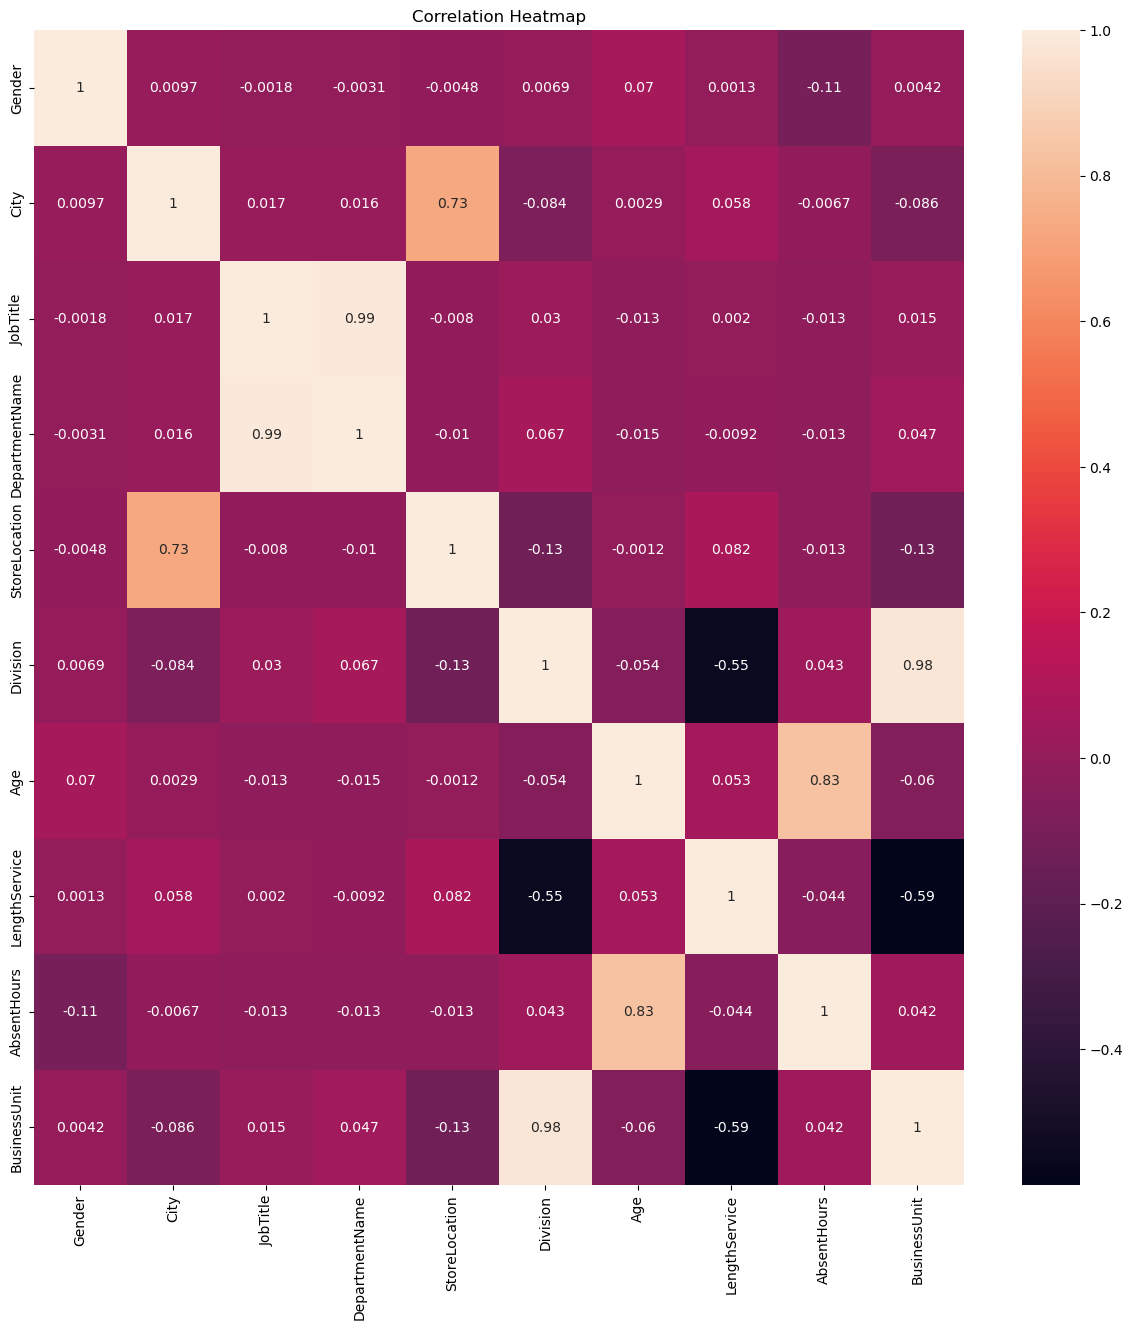

In [51]:
 _, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data=dff.corr(), ax=ax, annot=True)
ax.set_title('Correlation Heatmap')